<a href="https://colab.research.google.com/github/yohanesnuwara/geostatistics/blob/main/geostatistics_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
!git clone https://github.com/yohanesnuwara/geostatistics

Cloning into 'geostatistics'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 33 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


## Histograms and summary statistics

In [ ]:
prm03 = np.loadtxt('/content/geostatistics/data/FU3PRM.DAT', skiprows=1)
prm10 = np.loadtxt('/content/geostatistics/data/FU10PRM.DAT', skiprows=1)

prm03_df = pd.DataFrame({'Depth': prm03[:,0], 'Permea': prm03[:,1], 'Poro': prm03[:,2]})
prm10_df = pd.DataFrame({'Depth': prm10[:,0], 'Permea': prm10[:,1], 'Poro': prm10[:,2]})

prm03_df

,Depth,Permea,Poro
0,3071.0,710.0,23.9
1,3072.0,467.0,24.7
2,3073.0,325.0,24.0
3,3074.0,856.0,26.0
4,3075.0,895.0,26.7
...,...,...,...
206,2959.5,259.0,25.5
207,2960.5,341.0,25.3
208,2961.5,273.0,25.3
209,2962.5,273.0,24.5


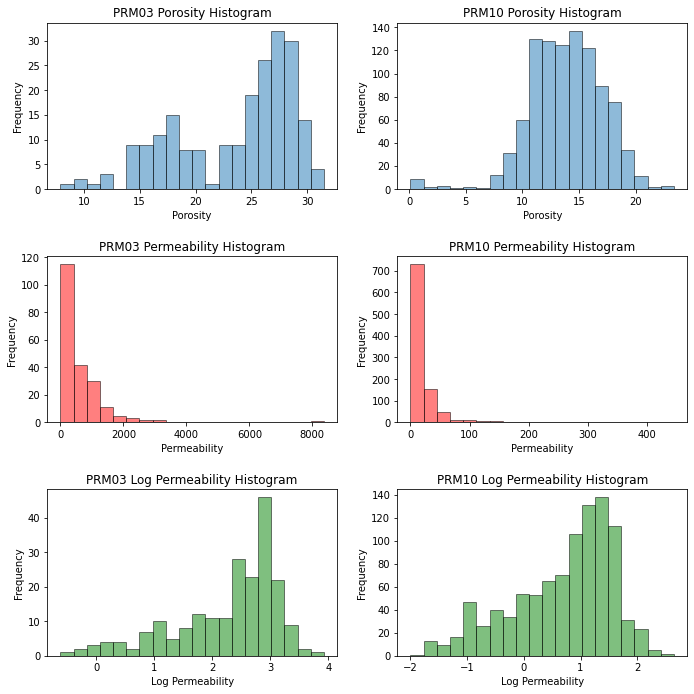

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.hist(prm03_df['Poro'], bins=20, edgecolor='black', alpha=0.5)
plt.xlabel('Porosity'); plt.ylabel('Frequency')
plt.title('PRM03 Porosity Histogram')

plt.subplot(3,2,2)
plt.hist(prm10_df['Poro'], bins=20, edgecolor='black', alpha=0.5)
plt.xlabel('Porosity'); plt.ylabel('Frequency')
plt.title('PRM10 Porosity Histogram')

plt.subplot(3,2,3)
plt.hist(prm03_df['Permea'], bins=20, color='red', edgecolor='black', alpha=0.5)
plt.xlabel('Permeability'); plt.ylabel('Frequency')
plt.title('PRM03 Permeability Histogram')

plt.subplot(3,2,4)
plt.hist(prm10_df['Permea'], bins=20, color='red', edgecolor='black', alpha=0.5)
plt.xlabel('Permeability'); plt.ylabel('Frequency')
plt.title('PRM10 Permeability Histogram')

plt.subplot(3,2,5)
plt.hist(np.log10(prm03_df['Permea']), bins=20, color='green', edgecolor='black', alpha=0.5)
plt.xlabel('Log Permeability'); plt.ylabel('Frequency')
plt.title('PRM03 Log Permeability Histogram')

plt.subplot(3,2,6)
plt.hist(np.log10(prm10_df['Permea']+0.01), bins=20,    # Trickery here +0.01 to add to 0 values 
         color='green', edgecolor='black', alpha=0.5)   # unless, log10 return -inf
plt.xlabel('Log Permeability'); plt.ylabel('Frequency')
plt.title('PRM10 Log Permeability Histogram')

plt.tight_layout(2)
plt.show()

In [ ]:
prm03_df.describe()

,Depth,Permea,Poro
count,211.000000,211.000000,211.000000
mean,2962.992891,587.959858,23.624645
std,49.836267,812.789551,5.307978
min,2906.500000,0.240000,7.900000
25%,2932.000000,67.000000,18.950000
50%,2951.500000,349.000000,25.600000
75%,2974.000000,855.000000,27.850000
max,3144.500000,8370.000000,31.500000


In [ ]:
prm03_df.describe()

,Depth,Permea,Poro
count,211.000000,211.000000,211.000000
mean,2962.992891,587.959858,23.624645
std,49.836267,812.789551,5.307978
min,2906.500000,0.240000,7.900000
25%,2932.000000,67.000000,18.950000
50%,2951.500000,349.000000,25.600000
75%,2974.000000,855.000000,27.850000
max,3144.500000,8370.000000,31.500000


## Probability density function (PDF) and confidence interval (CI)

Until now there is a confusion if CI equals to percentile (as the Stats Thinking II in Datacamp itself declared so), however I refer to Dr. Pyrcz' notebook [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_Hypothesis.ipynb) that CI has different formula. So, I assume both are different (and I believe so).

In [ ]:
def conf_interval(data, pvalue):
  """ Determine confidence interval """
  # Version 1 based on Stackoverflow: https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
  CI = scipy.stats.norm.interval(pvalue, loc=np.mean(data), scale=np.std(data))
  return CI

95% confidence interval between 13.245881311531068 and 34.00340778799499


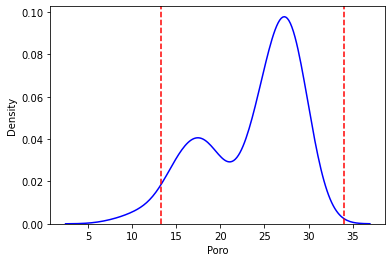

In [ ]:
pvalue = 0.95

# Compute CI
CI = conf_interval(prm03_df['Poro'], pvalue)
print('{}% confidence interval between {} and {}'.format(int(pvalue * 100), CI[0], CI[1]))

# Plot PDF
sns.kdeplot(prm03_df['Poro'], color='blue')
plt.axvline(CI[0], linestyle='--', color='red')
plt.axvline(CI[1], linestyle='--', color='red')

plt.show()

For PRM03 well, we are 95% confident that porosity is between 13.25% and 34%.

## Cumulative distribution function (CDF) plot

Visual tool to identify the probability of a thing and identify normal distribution.

In [ ]:
def ecdf(data):
    """
    Plot ECDF (Empirical Cumulative Distribution Function) 
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    plt.scatter(x, y, alpha=0.5)

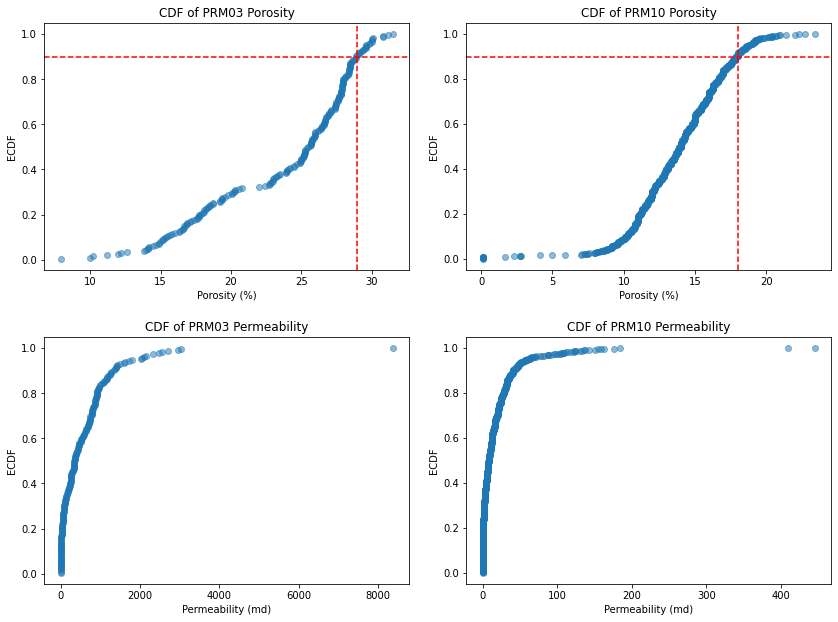

In [ ]:
# plot CDF for poroperm of PRM03 and PRM10
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
ecdf(prm03_df['Poro'].values)
plt.title('CDF of PRM03 Porosity')
plt.xlabel('Porosity (%)'); plt.ylabel('ECDF')
plt.axhline(0.9, linestyle='--', color='red') # 90% probability line
plt.axvline(29, linestyle='--', color='red')

plt.subplot(2,2,2)
ecdf(prm10_df['Poro'].values)
plt.title('CDF of PRM10 Porosity')
plt.xlabel('Porosity (%)'); plt.ylabel('ECDF')
plt.axhline(0.9, linestyle='--', color='red') # 90% probability line
plt.axvline(18, linestyle='--', color='red')

plt.subplot(2,2,3)
ecdf(prm03_df['Permea'].values)
plt.title('CDF of PRM03 Permeability')
plt.xlabel('Permeability (md)'); plt.ylabel('ECDF')

plt.subplot(2,2,4)
ecdf(prm10_df['Permea'].values)
plt.title('CDF of PRM10 Permeability')
plt.xlabel('Permeability (md)'); plt.ylabel('ECDF')

plt.tight_layout(2)
plt.show()

For PRM03, 90% probability a porosity is lower than 29%. For PRM10, 90% probability a porosity is lower than 18%.

## Probability distribution

Based on an oil field report, a pay zone has thickness with mean of 18 m and variance of 400 m2. Determine:
1. The probability of the pay zone to have a thickness less than 20 m

Solution:
$\sigma (std)=\sqrt {\sigma^2}=20$
$$Z=\frac{X-\mu}{\sigma}$$
$$Z=\frac{X-18}{20}$$

$$P(X>20)=P(Z>\frac{20-18}{20})=P(Z>0.1)=cdf(20)$$
cdf is cumulative distribution function. R equivalent is `pnorm`

2. The probability of the pay zone to have a thickness over 20 m

Solution:

$$P(X<20)=P(Z<\frac{20-18}{20})=P(Z<0.1)=1-P(Z>0.1)=1-cdf(20)$$

3. The probability of the pay zone to have a thickness between 20 m and 60 m

Solution:

$$P(20<X<60)=P(X<60)-P(X<20)=P(Z<\frac{60-18}{20})-P(Z<\frac{20-18}{20})=P(Z<2.1)-P(Z<0.1)=cdf(60)-cdf(20)$$

4. Maximum thickness of the pay zone for a probability as large as 80%

Solution:

$$P(Z<\frac{X-18}{20})=0.8$$

Solve $Z=ppf(0.8)$; ppf is percent point function (inverse of CDF). R equivalent is `qnorm`

Solve $X=20\cdot Z+18$



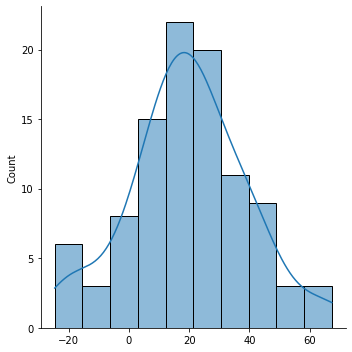

In [ ]:
# Histogram of pay zone with Seaborn (sns)
np.random.seed(10)
poro = np.random.normal(18, 20, 100) # generate random numbers with size 100

sns.displot(poro, kde=True)

In [ ]:
# Question 1
p1 = scipy.stats.norm.cdf(20, 18, 20) # 1st argument: thickness, 2nd: mean, 3rd: std
print('The probability of the pay zone to have a thickness < 20 m is:', np.round(p1, 3))

# Question 2
p2 = 1 - scipy.stats.norm.cdf(20, 18, 20) 
p2 = scipy.stats.norm.sf(20, 18, 20) # equivalent to above
print('The probability of the pay zone to have a thickness > 20 m is:', np.round(p2, 3))

# Question 3
p3 = scipy.stats.norm.cdf(60, 18, 20) - scipy.stats.norm.cdf(20, 18, 20)
print('The probability of the pay zone to have a thickness between 20 and 60 m is:', np.round(p3, 3))

# Question 4
Z = scipy.stats.norm.ppf(0.8)
x = 20 * Z + 18
print('Maximum thickness of pay zone to have probability 80% is: {} m'.format(np.round(x, 3)))

The probability of the pay zone to have a thickness < 20 m is: 0.54
The probability of the pay zone to have a thickness > 20 m is: 0.46
The probability of the pay zone to have a thickness between 20 and 60 m is: 0.442
Maximum thickness of pay zone to have probability 80% is: 34.832 m


Based on a field report, a formation has porosity with mean 0.2 and variance 0.0004. The porosity is normally distributed. Determine:
1. Probability of the formation to have porosity between 0.18 and 0.22
2. Probability of the formation is considered as a reservoir, if porosities less than 0.15 is considered not a reservoir
3. The required standard deviation so that probability in (2) becomes 70%

Solution:

$$P(Z<\frac{0.15-0.2}{\sigma})=0.7$$

Solve $Z=ppf(0.7)$

Solve $\sigma=\frac{0.15-0.2}{Z}$
4. The required mean so that probability of the formation to have porosity more than 0.15 becomes 85%
Solution:

$$P(Z<\frac{0.15-\mu}{0.02})=0.85$$

Solve $Z=ppf(0.85)$

Solve $\mu=0.15 - Z \cdot 0.02$

In [ ]:
mean = 0.2
var = np.sqrt(0.0004)

# Question 1
p1 = scipy.stats.norm.cdf(0.22, mean, var) - scipy.stats.norm.cdf(0.18, mean, var)
print('Probability of the formation to have porosity between 0.18 and 0.22 is:', np.round(p1, 3))

# Question 2
p2 = scipy.stats.norm.sf(0.15, mean, var)
print('Probability of the formation to have porosity above 0.15 to be considered as reservoir:', np.round(p2, 3))

# Question 3
expected_p1 = 0.7
z1 = scipy.stats.norm.ppf(1 - expected_p1)
std = 0.15 - 0.2 / z1
print('Std so that the formation having probability equals 70% to be considered as reservoir is:', np.round(std, 3))

# Question 4
expected_p2 = 0.85
z2 = scipy.stats.norm.ppf(1 - expected_p2)
mean = 0.15 - z2 * 0.02
print('Mean so that the formation having probability equals 85% to be considered as reservoir:', np.round(mean, 3))

Probability of the formation to have porosity between 0.18 and 0.22 is: 0.683
Probability of the formation to have porosity above 0.15 to be considered as reservoir: 0.994
Std so that the formation having probability equals 70% to be considered as reservoir is: 0.531
Mean so that the formation having probability equals 85% to be considered as reservoir: 0.171


## Theoretical quantile plot

Is used to identify if the data is normally (Gaussian) distributed. The median is data where quantile equals 0.5. 

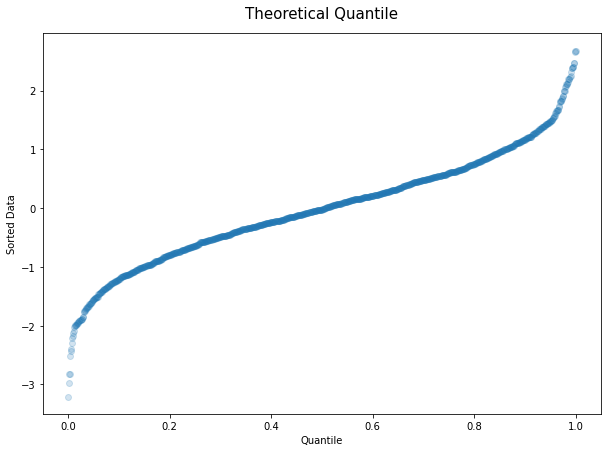

In [ ]:
# synthetic data
np.random.seed(10)
size = 1000
aa = np.random.normal(0, 1, size)

# create quantiles
x = np.linspace(0,1,size)  

# crossplot sorted data vs theoretical quantiles
plt.figure(figsize=(10,7))
plt.scatter(x, np.sort(aa), alpha=0.2)
plt.xlabel('Quantile'); plt.ylabel('Sorted Data')
plt.title('Theoretical Quantile', size=15, pad=15)
plt.show()

In [ ]:
def theo_quant(data, color='blue', alpha=0.2):
  """ Create theoretical quantile plot """
  size = len(data)
  q = np.linspace(0,1,size)
  plt.scatter(q, np.sort(data), color=color, alpha=alpha)
  plt.xlabel('Theoretical Quantiles')
  plt.ylabel('Sorted Data')

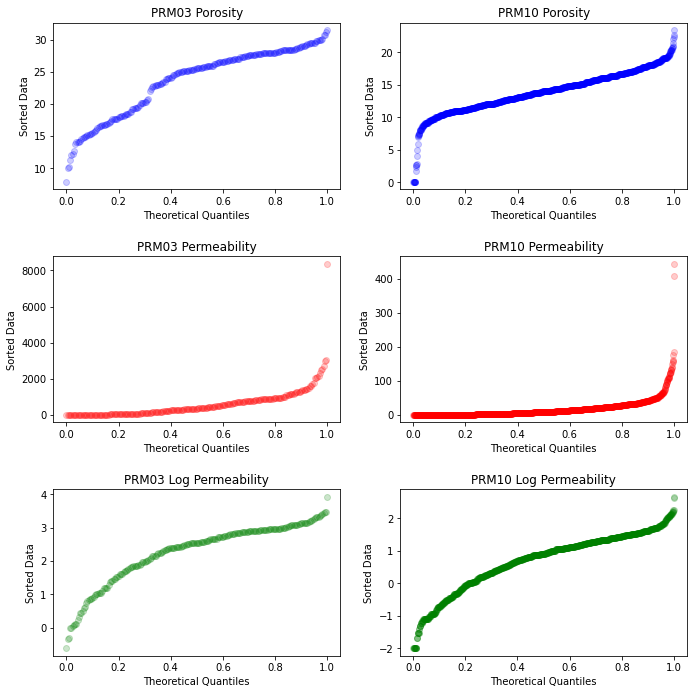

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
theo_quant(prm03_df['Poro'].values)
plt.title('PRM03 Porosity')

plt.subplot(3,2,2)
theo_quant(prm10_df['Poro'].values)
plt.title('PRM10 Porosity')

plt.subplot(3,2,3)
theo_quant(prm03_df['Permea'].values, color='red')
plt.title('PRM03 Permeability')

plt.subplot(3,2,4)
theo_quant(prm10_df['Permea'].values, color='red')
plt.title('PRM10 Permeability')

plt.subplot(3,2,5)
theo_quant(np.log10(prm03_df['Permea'].values), color='green')
plt.title('PRM03 Log Permeability')

plt.subplot(3,2,6)
theo_quant(np.log10(prm10_df['Permea'].values), color='green')
plt.title('PRM10 Log Permeability')

plt.tight_layout(2)
plt.show()

## Q-Q Plot

Q-Q plot practical explanation see [here](https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/). R equivalent is `qqnorm` and `qqline`

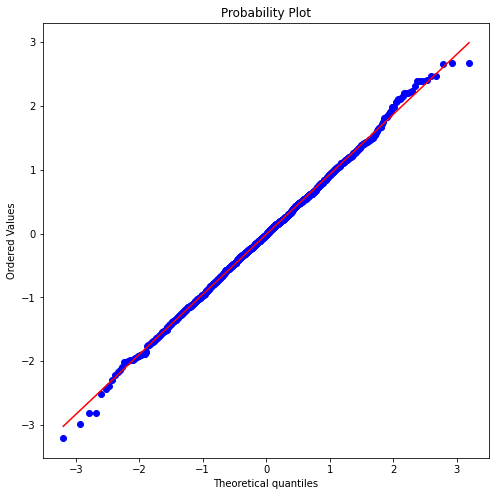

In [ ]:
plt.figure(figsize=(8,8))
scipy.stats.probplot(aa, plot=plt)
plt.show()

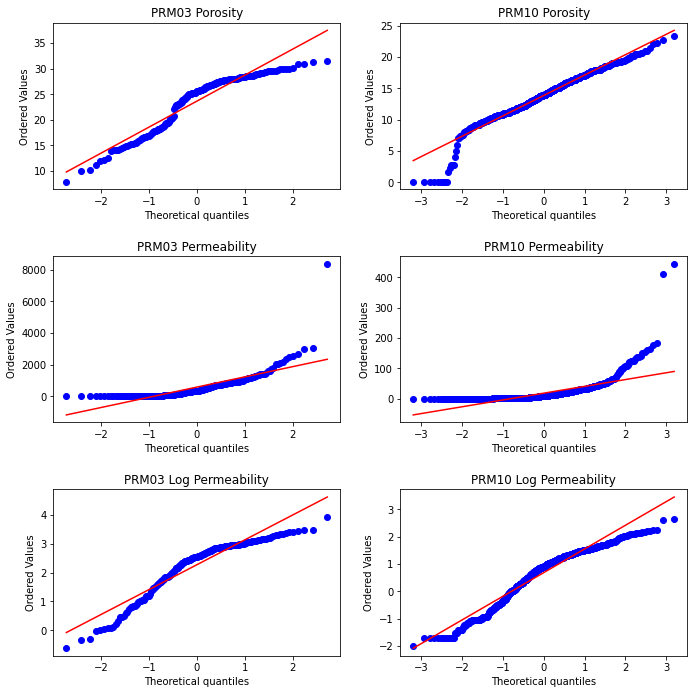

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
scipy.stats.probplot(prm03_df['Poro'], plot=plt)
plt.title('PRM03 Porosity')

plt.subplot(3,2,2)
scipy.stats.probplot(prm10_df['Poro'], plot=plt)
plt.title('PRM10 Porosity')

plt.subplot(3,2,3)
scipy.stats.probplot(prm03_df['Permea'], plot=plt)
plt.title('PRM03 Permeability')

plt.subplot(3,2,4)
scipy.stats.probplot(prm10_df['Permea'], plot=plt)
plt.title('PRM10 Permeability')

plt.subplot(3,2,5)
scipy.stats.probplot(np.log10(prm03_df['Permea']), plot=plt)
plt.title('PRM03 Log Permeability')

plt.subplot(3,2,6)
scipy.stats.probplot(np.log10(prm10_df['Permea']+0.01), plot=plt)
plt.title('PRM10 Log Permeability')

plt.tight_layout(2)
plt.show()

## Kurtosis

Kurtosis is used to identify signal and noise in a time series data, such as a seismogram, i.e. to pick seismic events.

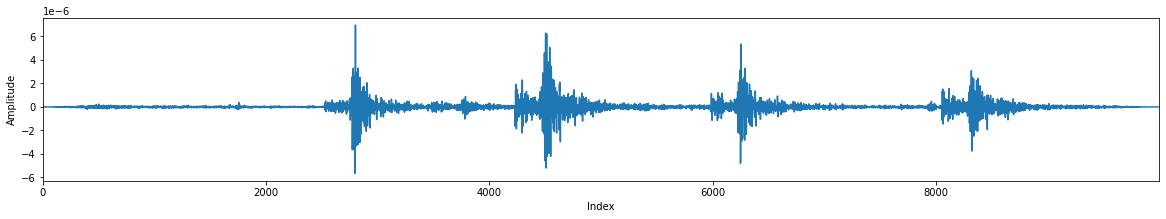

In [ ]:
# get seismogram data
seis = np.loadtxt('/content/geostatistics/data/seis-ch1.txt', skiprows=1, usecols=1)

# plot seismogram
x = np.arange(len(seis))
plt.figure(figsize=(20,3))
plt.plot(x, seis)
plt.xlim(0, max(x))
plt.xlabel('Index'); plt.ylabel('Amplitude')
plt.show()

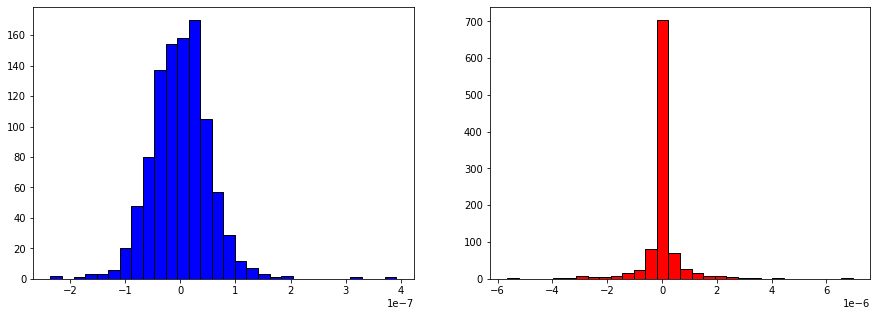

In [ ]:
# plot histogram 
# Gaussian at index 1000-2000, non-Gaussian at 2000-3000
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(seis[1000:2000], bins=30, color='blue', edgecolor='black')

plt.subplot(1,2,2)
plt.hist(seis[2000:3000], bins=30, color='red', edgecolor='black')

plt.show()

In [ ]:
def kurtosis(data, window=10):
  """ Calculate kurtosis over a specified window """
  kurt = []
  for i in range(len(data)):
    a = data[i:i+window]
    std, mean = np.std(data), np.mean(data)
    y = np.sum((a - mean)**4) / window
    k = y / std**4
    kurt.append(k)
  return kurt

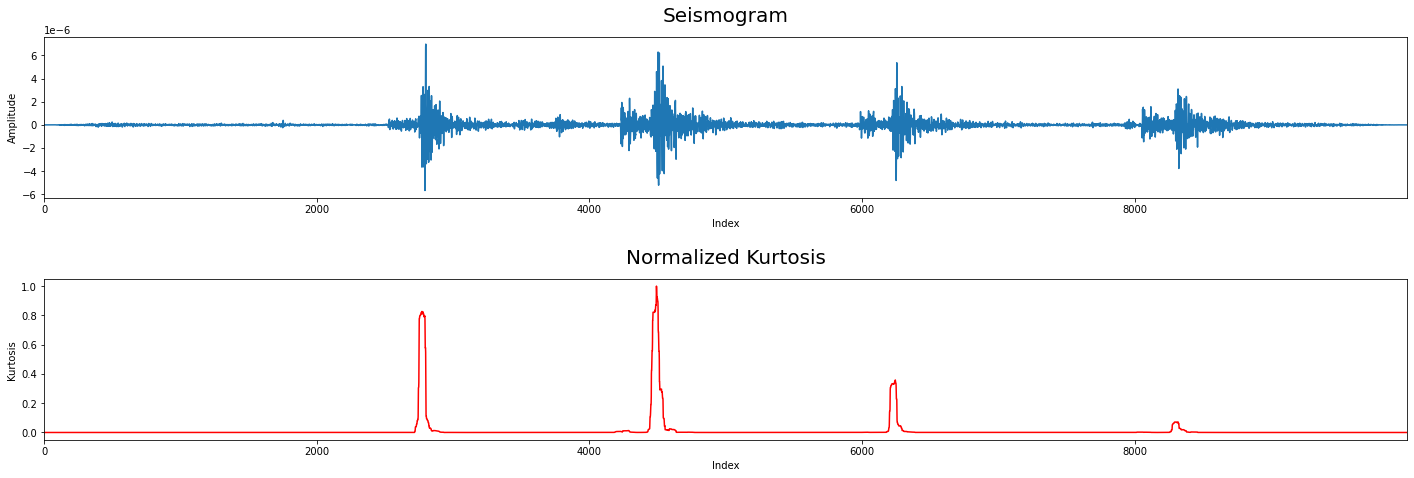

In [ ]:
# calculate rolling kurtosis with window 50
kurt = kurtosis(seis, window=50)

# plot seismogram and kurtosis
x = np.arange(len(seis))
plt.figure(figsize=(20,7))

plt.subplot(2,1,1)
plt.plot(x, seis)
plt.xlim(0, max(x))
plt.xlabel('Index'); plt.ylabel('Amplitude')
plt.title('Seismogram', size=20, pad=15)

plt.subplot(2,1,2)
plt.plot(x, kurt/max(kurt), color='red')
plt.xlim(0, max(x))
plt.xlabel('Index'); plt.ylabel('Kurtosis')
plt.title('Normalized Kurtosis', size=20, pad=15)

plt.tight_layout(2)
plt.show()

## Cross-correlation

Correlation between two data at zero-lag

In [ ]:
def xcor(x, y):
  """ Calculate cross-correlation between two data """
  cxy = np.cov(x, y)[0,1]
  var1, var2 = np.var(x), np.var(y)
  xcor = cxy / np.sqrt(var1 * var2)
  return xcor  

Test into synthetic data. Data `aa` and `bb` have independently randomness. The crosscorrelation will equal nearly 0, because there's no correlation.

-0.06600247112696178
-0.06593646865583483


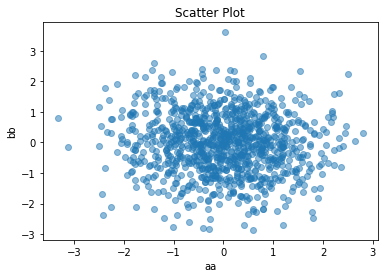

In [ ]:
# test synthetic data
aa = np.random.normal(0, 1, 1000)
bb = np.random.normal(0, 1, 1000)

print(xcor(aa, bb))             # using the created function
print(np.corrcoef(aa, bb)[0,1]) # using Numpy built-in function

# scatter plot of data
plt.scatter(aa, bb, alpha=0.5)
plt.xlabel('aa'); plt.ylabel('bb')
plt.title('Scatter Plot')

plt.show()

Test to other synthetic data, one has positive correlation, another has negative correlation

Cross-correlation of data 1 is: 0.994
Cross-correlation of data 2 is: -0.994


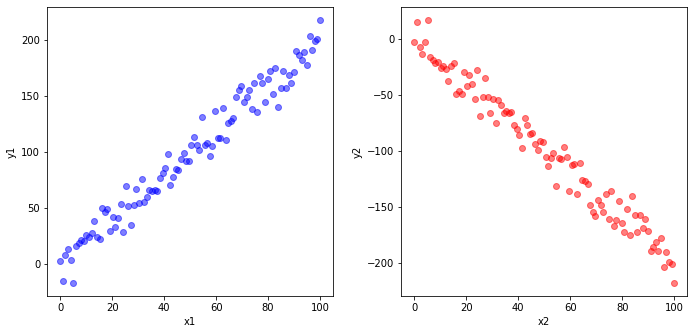

In [ ]:
# synthetic data
x1 = x2 = np.linspace(0,100,100)
noise = np.random.normal(0,1,100) * 10
y1 = 2 * x1 + noise
y2 = -y1

xcor1 = xcor(x1, y1)
xcor2 = xcor(x2, y2)
print('Cross-correlation of data 1 is:', np.round(xcor1, 3))
print('Cross-correlation of data 2 is:', np.round(xcor2, 3))

# plot data
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x1, y1, color='blue', alpha=0.5)
plt.xlabel('x1'); plt.ylabel('y1')

plt.subplot(1,2,2)
plt.scatter(x2, y2, color='red', alpha=0.5)
plt.xlabel('x2'); plt.ylabel('y2')

plt.tight_layout(2)
plt.show()

Analyze cross-correlation between porosity and permeability of PRM03 well. 

Cross-correlation of poroperm in PRM03 well is: 0.564


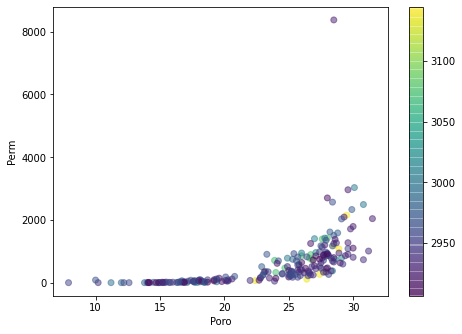

In [ ]:
poroperm = xcor(prm03_df['Poro'].values, prm03_df['Permea'].values)
print('Cross-correlation of poroperm in PRM03 well is:', np.round(poroperm, 3))

# plot data
plt.figure(figsize=(7,5))

plt.scatter(prm03_df['Poro'].values, prm03_df['Permea'].values, 
            c=prm03_df['Depth'], alpha=0.5)
plt.xlabel('Poro'); plt.ylabel('Perm')
plt.colorbar()

plt.tight_layout(2)
plt.show()

## Auto-correlation

Is the cross-correlation at one portion of the data to another portion of the data (lags).

In [ ]:
def autocor(x):
  """ Calculate auto-correlation in a data """
  nm = len(x)
  autocor = np.zeros(nm)
  for i in range(nm):
    autocor[i] = np.corrcoef(x[i:nm-1], x[:nm-i-1])[0,1]  
  return autocor

Test into a synthetic data. The data `bb` consists of 9 times repeated sequence `aa`. The autocorrelation in the correlalogram will show that lag happens at every 100 inetrvals.

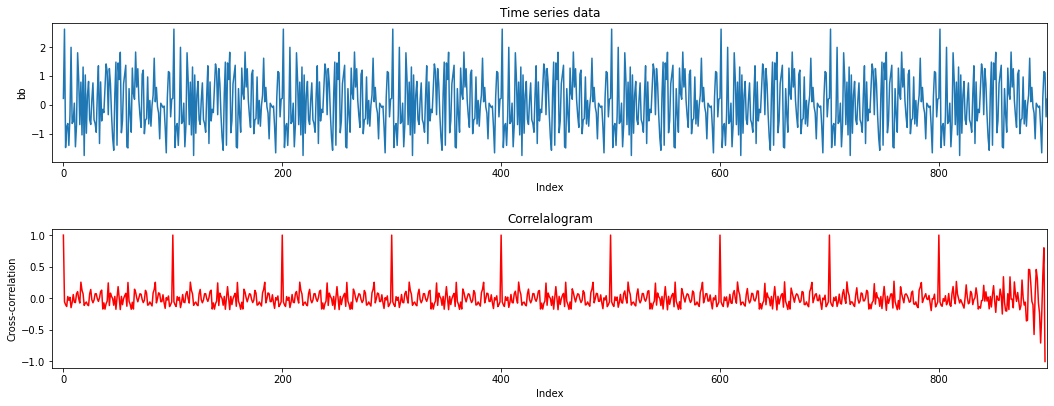

In [ ]:
# test synthetic data
aa = np.random.normal(0, 1, 100)
bb = np.concatenate((aa, aa, aa, aa, aa, aa, aa, aa, aa)) # 9 times repeated aa 

# calculate autocorrelation
ac = autocor(bb)

# plot data
index = np.arange(len(bb))

plt.figure(figsize=(15,6))

plt.subplot(2,1,1)
plt.plot(index, bb)
plt.title('Time series data')
plt.xlabel('Index'); plt.ylabel('bb')
plt.xlim(-10, max(index))

# plot correlalogram
plt.subplot(2,1,2)
plt.plot(index, ac, color='red')
plt.title('Correlalogram')
plt.xlabel('Index'); plt.ylabel('Cross-correlation')
plt.xlim(-10, max(index))

plt.tight_layout(2)
plt.show()

Case study: An industry is dumping wastewater into underground, and some seismic activities are felt. Given the data of seismic activities, using autocorrelation identify is there any correlation between the wastewater injection and the seismic activities? 

In [ ]:
eq = pd.read_excel('/content/geostatistics/data/Wasteinjected.xlsx')

eq.head(10)

,Mo-Yr,Waste-Mmgal,Earthquakes,Seq.Mo
0,1962-03-01,4.2,0,3
1,1962-04-01,7.2,2,4
2,1962-05-01,8.4,12,5
3,1962-06-01,8.0,35,6
4,1962-07-01,5.2,23,7
5,1962-08-01,6.0,29,8
6,1962-09-01,5.0,24,9
7,1962-10-01,5.6,8,10
8,1962-11-01,4.0,6,11
9,1962-12-01,3.6,20,12


In [ ]:
def autocor2(x, y):
  """ Calculate auto-correlation between two data """
  nm = len(x) # length of y must be the same as x
  autocor = np.zeros(nm)
  for i in range(nm):
    autocor[i] = np.corrcoef(x[i:nm-1], y[:nm-i-1])[0,1]  
  return autocor  

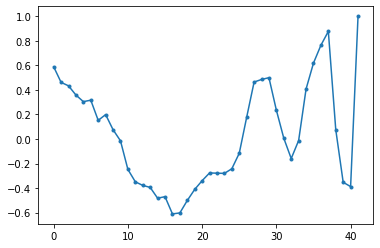

In [ ]:
# calculate autocorrelation
x = eq.iloc[:,1].values # injected waste volume MMgal
y = eq.iloc[:,2].values # number of earthquakes
t = np.arange(len(x))   # months
ac = autocor2(x, y)

plt.plot(t, ac, '.-')
plt.show()

## Hypothesis test I: one sample test

Test null hypothesis $H_0$

If after hypothesis test, $-Z_{crit}<Z_{cal}<+Z_{crit}$, then accept $H_0$

If $Z_{cal}<-Z_{crit}$ or $Z_{cal}>+Z_{crit}$, then reject $H_0$

⚠️ Tips to state null hypothesis:

* $H_0$ is always "something less than or equal to something". For instance: "Mean is less than or equal to 7" ($\mu \leq 7$).
* The alternate hypothesis $H_1$ is its contrary. In this case, "Mean is above 7" ($\mu>7$).


In [ ]:
def ttest_1sample(mean_pop, mean_samp, std_pop, num_samp, h0, alpha=0.05):
  """ 
  Hypothesis test on one sample 

  Input: 

  mean_pop = mean of population (also called as the claimed mean)
  mean_samp = mean of sample (samples used to test the hypothesis)
  std_pop = standard deviation of population
  num_samp = number of samples
  h0 = null hypothesis, e.g. in a statement "Mean = 8 kg"
  alpha = significance level. default is 0.05 or 5% (95% confidence)

  Output:

  Zcal and Zcrit,
  decision = accept or reject h0, based on Z-value comparison, in a statement
  """
  # Z calculated
  zcal = (mean_samp - mean_pop) / (std_pop / np.sqrt(num_samp))
  
  # Z critical (two-tailed)
  zcrit1, zcrit2 = scipy.stats.norm.ppf([alpha/2, 1-(alpha/2)]) # Z-value @ p=0.025 and p=0.975
  
  # print Zcal and Zcrit
  print('Calculated Z :', np.round(zcal, 3))
  print('Critical Z   : {}, {}'.format(np.round(zcrit1, 3), np.round(zcrit2, 3)))

  # hypothesis testing
  if zcal > zcrit1 and zcal < zcrit2:
    print('Accept that {}'.format(h0))
  if zcal < zcrit1 or zcal > zcrit2:
    print('Reject that {}'.format(h0))

**Case Study 1**

A designed material is claimed that it can withstand weights with mean of 8 kg (standard deviation of 0.5 kg). However, from 50 random samples it's found that they can only withstand to weights with mean of 7.8 kg. Use significance level 1%.

Is the claim true?

* Null hypothesis $H_0$: Claim is true ($\mu=8$)

* Alternative hypothesis $H_1$: Claim is false ($\mu \neq 8$)

In [ ]:
# Input
mean_pop = 8 # claimed mean
mean_samp = 7.8 # true mean (from samples)
std_pop = 0.5 # std of population
num_samp = 50 # number of samples

# Null hypothesis
h0 = 'The material can withstand weights with mean 8 kg'

# Run test
ttest_1sample(mean_pop, mean_samp, std_pop, num_samp, h0, alpha=0.1)

Calculated Z : -2.828
Critical Z   : -1.645, 1.645
Reject that The material can withstand weights with mean 8 kg


**Case Study 2**

From 100 random samples, it is found that mean life expectancy in USA is 71.8. Assuming that the whole population has life expectancy distribution with standard deviation of 8.9 years, are the samples enough to conclude that US people have mean life expectancy above 70? Use significance level 5%.

* Null hypothesis $H_0$: Mean life expectancy under/equal to 70 ($\mu \leq 70$)

* Alternative hypothesis $H_1$: Mean life expectancy above 70 ($\mu > 70$)

In [ ]:
# Input
mean_pop = 70 # claimed mean
mean_samp = 71.8 # true mean (from samples)
std_pop = 8.9 # std of population
num_samp = 100 # number of samples

# Null hypothesis
h0 = 'Mean life expectancy of US people is below or equal to 70'

# Run test
ttest_1sample(mean_pop, mean_samp, std_pop, num_samp, h0, alpha=0.05)

Calculated Z : 2.022
Critical Z   : -1.96, 1.96
Reject that Mean life expectancy of US people is below or equal to 70


## Hypothesis test II: two sample T-test

Perform test to compare mean between two samples. Note that in stats, Mean 20.9 and 19.4 could be similar (statistically). So, the significance of such similarity should be tested. 

For example, I have a claim: 

> Your thermometer has mean error 0.02°C larger than mine 🌡️

Beware when making a null hypothesis. Remember that a keyword for $H_0$ must be "less than $<$" or "equal to $=$". The alternate hypothesis $H_1$ is "more than $>$".

So, related to the above claim, I have to switch into following hypotheses:
* $H_0$: Our thermometers mean error has no difference ($\mu_{you}=\mu_{mine}$ OR $\mu_{you}-\mu_{mine}=0$)
* $H_1$: Your thermometer mean error is larger than mine ($\mu_{you}>\mu_{mine}$ OR $\mu_{you}-\mu_{mine}=0.02$)


In [ ]:
def ttest_2sample(d0, mean_samp1, mean_samp2, std_samp1, std_samp2, 
                 num_samp1, num_samp2, h0, alpha=0.05):
  """
  Hypothesis test on two samples
  e.g. to test if mean of one sample equals mean of the another sample
  
  Input:

  d0 = expected (claimed) difference between mean of sample 1 and sample 2
    * If expected no difference, or μ1 = μ2, input d0=0
    * If expected difference μ1-μ2=5, input d0=5
  mean_samp1, mean_samp2 = means of sample 1 and sample 2
  std_samp1, std_samp2 = standard deviation of sample 1 and sample 2
  num_samp1, num_samp2 = number of sample 1 and sample 2
  h0 = null hypothesis, e.g. "Mean of sample 1 equals sample 2"
  alpha = significance level. Default is 0.05

  Output: 

  tcal, tcrit,
  decision = accept or reject h0, based on t-value comparison, in a statement  
  """

  # t-value calculated
  sp = np.sqrt(((std_samp1**2 * (num_samp1 - 1)) + (std_samp2**2 * (num_samp2 - 1))) / (num_samp1 + num_samp2 - 2))
  tcal = ((mean_samp1 - mean_samp2) - d0) / (sp * np.sqrt((1 / num_samp1) + (1 / num_samp2)))

  # t-value critical (two-tailed)
  df = num_samp1 + num_samp2 - 2 # degree of freedom
  tcrit1, tcrit2 = scipy.stats.t.ppf([alpha/2, 1-(alpha/2)], df) # Default: t-value @ p=0.025 and p=0.975

  # print tcal and tcrit
  print('Calculated t-value :', np.round(tcal, 3))
  print('Critical t-value   : {}, {}'.format(np.round(tcrit1, 3), np.round(tcrit2, 3)))    

  # hypothesis testing
  if tcal > tcrit1 and tcal < tcrit2:
    print('Accept that {}'.format(h0))
  if tcal < tcrit1 or tcal > tcrit2:
    print('Reject that {}'.format(h0)) 

**Case study 3** (Adapted from Dr. Pyrcz' [material & dataset](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_Hypothesis.ipynb))

Given 20 porosity measurements from 2 different rock units. Is the mean of porosity of Rock A similar to that of Rock B?

* Null hypothesis $H_0$: $\mu_A=\mu_B$ or $\mu_A-\mu_B=0$

> Could also be $H0$: $\mu_A \leq \mu_B$ or $\mu_A-\mu_B \leq 0$ 

* Alternative hypothesis $H_1$: $\mu_A>\mu_B$ or $\mu_A-\mu_B>0$

* So, $d_0$ (claimed mean difference) is 0

In [ ]:
filepath = 'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv'

sample = pd.read_csv(filepath)
sample.head()

,X1,X2
0,0.21,0.20
1,0.17,0.26
2,0.15,0.20
3,0.20,0.19
4,0.19,0.13


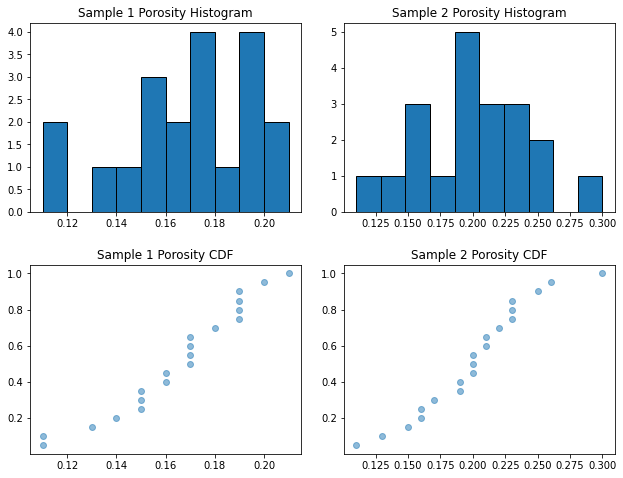

In [ ]:
poro1, poro2 = sample['X1'].values, sample['X2'].values

# plot histograms and cdf plot
plt.figure(figsize=(9,7))

plt.subplot(2,2,1)
plt.hist(poro1, edgecolor='black')
plt.title('Sample 1 Porosity Histogram')

plt.subplot(2,2,2)
plt.hist(poro2, edgecolor='black')
plt.title('Sample 2 Porosity Histogram')

plt.subplot(2,2,3)
ecdf(poro1)
plt.title('Sample 1 Porosity CDF')

plt.subplot(2,2,4)
ecdf(poro2)
plt.title('Sample 2 Porosity CDF')

plt.tight_layout(2)
plt.show()

In [ ]:
# Input
d0 = 0 # claimed difference between mean of two samples
mean_samp1 = np.mean(poro1) # sample 1 mean
mean_samp2 = np.mean(poro2) # sample 2 mean
std_samp1 = np.std(poro1) # sample 1 std
std_samp2 = np.std(poro2) # sample 2 std
num_samp1 = 20 # number of sample 1
num_samp2 = 20 # number of sample 2

# Null hypothesis
h0 = 'Porosity mean of sample 1 equals to that of sample 2'

# Run test
ttest_2sample(d0, mean_samp1, mean_samp2, std_samp1, std_samp2, 
             num_samp1, num_samp2, h0, alpha=0.05)

Calculated t-value : -3.058
Critical t-value   : -2.024, 2.024
Reject that Porosity mean of sample 1 equals to that of sample 2


**Case study 4**

An experiment was performed to compare the abrasive wear of two different laminated materials. Twelve pieces of material 1 were tested by exposing each piece to a machine measuring wear. Ten pieces of material 2 were similarly tested. In each
case, the depth of wear was observed. The samples of material 1 gave an average
(coded) wear of 85 units with a sample standard deviation of 4, while the samples
of material 2 gave an average of 81 with a sample standard deviation of 5. Can
we conclude at the 0.05 level of significance that the abrasive wear of material 1
exceeds that of material 2 by more than 2 units?

Claim: Abrasive wear of material 1 exceeds that of material 2 by more than 2 units.

For a null hypothesis, "more than" cannot be $H_0$ (see explanation in Hypothesis test I). So, I have to switch, as follows: 

* Null hypothesis $H_0$: There is no difference in mean abrasive wear between two materials ($\mu_A=\mu_B$ or $\mu_A-\mu_B = 0$)

* Alternative hypothesis $H_1$: Abrasive wear of material 1 exceeds that of material 2 by more than 2 units. ($\mu_A-\mu_B > 2$)

* So, $d_0$ (claimed mean difference) is 2

So, if $H_0$ is accepted, then claim is wrong. Otherwise ($H_0$ is rejected), then claim is (statistically) right.

Be careful...

In [ ]:
# Input
d0 = 2 # claimed difference between mean of two samples
mean_samp1 = 85 # sample 1 mean
mean_samp2 = 81 # sample 2 mean
std_samp1 = 4 # sample 1 std
std_samp2 = 5 # sample 2 std
num_samp1 = 12 # number of sample 1
num_samp2 = 10 # number of sample 2

# Null hypothesis
# Note: don't forget to switch the claim
h0 = 'There is no difference in mean abrasive wear between two materials'

# Run test
ttest_2sample(d0, mean_samp1, mean_samp2, std_samp1, std_samp2, 
             num_samp1, num_samp2, h0, alpha=0.05)

Calculated t-value : 1.043
Critical t-value   : -2.086, 2.086
Accept that There is no difference in mean abrasive wear between two materials


It means we cannot conclude that material A has mean abrasive wear 2 units larger than material B.

## Hypothesis test III: two sample F-test

Perform test to compare variance between two samples. 

In [ ]:
def ftest_2sample(var_samp1, var_samp2, num_samp1, num_samp2, h0, alpha=0.05):
  """
  Hypothesis test on two samples
  e.g. to test if variance of one sample equals variance of the another sample
  
  Input:

  var_samp1, var_samp2 = variance of sample 1 and sample 2
  mean_samp1, mean_samp2 = means of sample 1 and sample 2

  Output: 

  pvalue,
  decision = accept or reject h0, based on pvalue comparison, in a statement  
  """  
  # compute p-value calculated
  pcal = 1 - scipy.stats.f.cdf(var_samp2 / var_samp1, dfn = num_samp2 - 1, 
                                 dfd = num_samp1 - 1)
  print('Calculated p-value :', pcal)

  # hypothesis testing
  if pcal < alpha:
    print('Reject that {}'.format(h0))
  else:
    print('Accept that {}'.format(h0)) 

In [ ]:
# Input
var_samp1 = np.var(poro1) # sample 1 mean
var_samp2 = np.var(poro2) # sample 2 mean
num_samp1 = 20 # number of sample 1
num_samp2 = 20 # number of sample 2

# Null hypothesis
h0 = 'Porosity variance of sample 1 equals to that of sample 2'

# Run test
ftest_2sample(var_samp1, var_samp2, num_samp1, num_samp2, h0, alpha=0.05)

Calculated p-value : 0.01918734806315381
Reject that Porosity variance of sample 1 equals to that of sample 2


## Hypothesis test IV: $\chi^2$ (Chi)-test

Perform test to identify whether data is normally distributed. 

## Hypothesis test V: with bootstrapping

## 1D Variogram (principle, code from scratch)

In this part, I'd (only) like to demonstrate the principle of variogram, from plotting experimental (empirical) variogram with the function I built `variogram`, making variogram models (spherical, exponential, gaussian) with `vgm`, and fitting with `fit_variogram`. Applied in 1D (depth) data of porosity log. 

The lag distance between points is assumed to be uniformly 1. In real practice, lag distances are more complicated, and applied in 2D (x and y data). 

The next part, will use `Scikit Gstat` to do variogram analysis.

In [ ]:
w3429 = np.loadtxt('/content/geostatistics/data/34-29.DAT', skiprows=1) # well 34-29

# poroperm of well 34-29
perm3429, poro3429 = w3429[:,1], w3429[:,2]

Plot the empirical (observation) variogram

In [ ]:
def variogram(data, nlag):
  """ Plot variogram from 1D data """
  nn = len(data)
  sv = np.zeros(nlag) # initialize semivariance
  h = np.arange(nlag) # lags (distance)

  for i in range(nlag):
    data1 = data[:nn-i-1]
    data2 = data[(i+1):nn]
    data3 = (data1 - data2)**2
    sv[i] = 0.5 * np.mean(data3) # semivariance
  vv = h, sv # output
  return vv

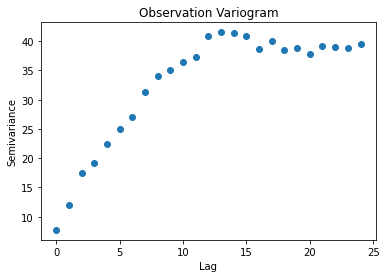

In [ ]:
# Plot variogram, give cutoff nlag=25
vv = variogram(poro3429, nlag=25)
plt.scatter(vv[0], vv[1])
plt.title('Observation Variogram')
plt.xlabel('Lag'); plt.ylabel('Semivariance')

plt.show()

In [ ]:
a=[0,1,2,3,4,5,6,7]
a[:3+1] # Range 3, <=
a[3+1:]

[4, 5, 6, 7]

Make variogram models. Reference for models [here](https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/variogram_models.html)

In [ ]:
def vgm(psill, range, nlag, model, nugget=0):
  """ Plot variogram model """
  h = np.linspace(0, nlag, 100) # lags (distance)
  if model=='Exp':
    sv = nugget + psill * (1 - np.exp(-h / (range / 3)))
  if model=='Gau':
    sv = nugget + psill * (1 - np.exp(-h**2 / (4 * range / 7)**2))
  
  vm = h, sv
  return vm 

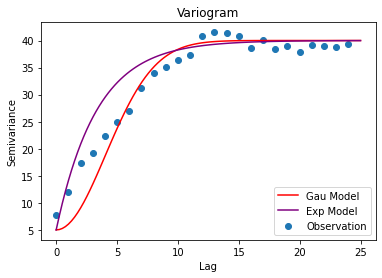

In [ ]:
# Plot experimental variogram, give cutoff nlag=25
vv = variogram(poro3429, nlag=25)
plt.scatter(vv[0], vv[1], label='Observation')

# Create variogram models and approach the experimental variogram
vm1 = vgm(psill=35, range=10, nlag=25, model='Gau', nugget=5)
vm2 = vgm(psill=35, range=10, nlag=25, model='Exp', nugget=5)
plt.plot(vm1[0], vm1[1], color='red', label='Gau Model')
plt.plot(vm2[0], vm2[1], color='purple', label='Exp Model')

plt.title('Variogram')
plt.xlabel('Lag'); plt.ylabel('Semivariance')

plt.legend()
plt.show()

Fit variogram models to observation variogram.

In [ ]:
def fit_variogram(vv, model):
  """ Fit experimental variogram with model """
  from scipy.optimize import curve_fit

  h, sv_obs = vv

  def vgm_exp(h, psill, range, nugget):  
    sv = nugget + psill * (1 - np.exp(-h / (range / 3)))
    return sv
  def vgm_gau(h, psill, range, nugget):  
    sv = nugget + psill * (1 - np.exp(-h**2 / (4 * range / 7)**2))
    return sv 
  
  
  if model=='Exp':
    [psill, range, nugget], pcov = curve_fit(vgm_exp, h, sv_obs)
  if model=='Gau':
    [psill, range, nugget], pcov = curve_fit(vgm_gau, h, sv_obs)    
  
  return psill, range, nugget # optimum parameters

Fit with Gaussian model

Best parameters for Gau model
Best partial sill  : 27.891
Best range         : 10.853
Best nugget        : 11.601


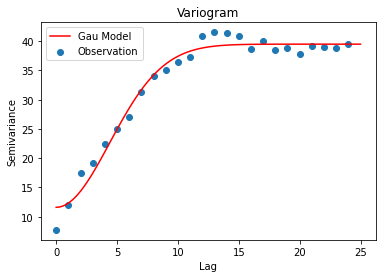

In [ ]:
# Plot experimental variogram, give cutoff nlag=25
vv = variogram(poro3429, nlag=25)
plt.scatter(vv[0], vv[1], label='Observation')

# Fit variogram model to experimental variogram
model = 'Gau'

psill_best, range_best, nugget_best = fit_variogram(vv, model=model)
print('Best parameters for {} model'.format(model))
print('Best partial sill  : {}'.format(np.round(psill_best, 3)))
print('Best range         : {}'.format(np.round(range_best, 3)))
print('Best nugget        : {}'.format(np.round(nugget_best, 3)))

# Plot variogram model with the best parameters
vm = vgm(psill=psill_best, range=range_best, nlag=25, model=model, nugget=nugget_best)
plt.plot(vm[0], vm[1], color='red', label='{} Model'.format(model))

plt.title('Variogram')
plt.xlabel('Lag'); plt.ylabel('Semivariance')

plt.legend()
plt.show()

Fit with Exponential model

Best parameters for Exp model
Best partial sill  : 34.958
Best range         : 16.166
Best nugget        : 6.021


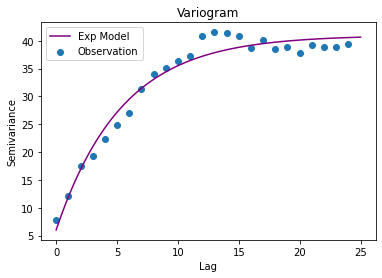

In [ ]:
# Plot experimental variogram, give cutoff nlag=25
vv = variogram(poro3429, nlag=25)
plt.scatter(vv[0], vv[1], label='Observation')

# Fit variogram model to experimental variogram
model = 'Exp'

psill_best, range_best, nugget_best = fit_variogram(vv, model=model)
print('Best parameters for {} model'.format(model))
print('Best partial sill  : {}'.format(np.round(psill_best, 3)))
print('Best range         : {}'.format(np.round(range_best, 3)))
print('Best nugget        : {}'.format(np.round(nugget_best, 3)))

# Plot variogram model with the best parameters
vm = vgm(psill=psill_best, range=range_best, nlag=25, model=model, nugget=nugget_best)
plt.plot(vm[0], vm[1], color='purple', label='{} Model'.format(model))

plt.title('Variogram')
plt.xlabel('Lag'); plt.ylabel('Semivariance')

plt.legend()
plt.show()

## 2D Variogram (using Scikit-Gstat)

After knowing the principle, let's more to a more realistic variogram analysis, now in 2D and the lag distances are more complicated (not 1 anymore). 

In R, the lag distance is expressed in the function: `variogram(width=1)`. Previously, we use 1. Now, because we don't exactly know the `width`, in Python, `scikit-gstat` automatically groups the lag distances, what is called as "binning". 

Apply 2D variogram analysis on our x, y, thickness data.

In [ ]:
!pip install scikit-gstat

     |████████████████████████████████| 71kB 3.4MB/s 
  Created wheel for scikit-gstat: filename=scikit_gstat-0.3.1-cp36-none-any.whl size=70872 sha256=068c8b7f93f9c335bd371ba9fdeae7390206fcab441d0e49391409f267e6eb86
  Stored in directory: /root/.cache/pip/wheels/4d/48/c2/f9b570ca3ac794ff7c8edae35c432171575274ea1392b0e65c
Successfully built scikit-gstat


In [ ]:
import skgstat

In [ ]:
# load depth dataset
depth = np.loadtxt('/content/geostatistics/data/dpth.txt', skiprows=1)
x, y, z = depth.T

coords = list(zip(x, y))

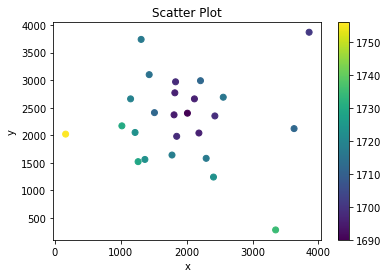

In [ ]:
plt.scatter(x, y, c=z)
plt.title('Scatter Plot')
plt.xlabel('x'); plt.ylabel('y')
plt.colorbar()

plt.show()

Lag distances (bins) on the x-axis : [ 206.47859453  412.95718906  619.4357836   825.91437813 1032.39297266
 1238.87156719 1445.35016173 1651.82875626 1858.30735079 2064.78594532
 2271.26453985 2477.74313439 2684.22172892 2890.70032345 3097.17891798
 3303.65751252 3510.13610705 3716.61470158 3923.09329611 4129.57189064]
Semivariances on the y-axis        : [ 10.83333333  57.5         80.83333333 156.14864865 265.09375
 227.13513514 242.33928571 152.5        406.28571429 750.68181818
 324.53333333 236.54545455 363.31818182  80.         324.35714286
 185.         444.5        399.25       162.           0.        ]


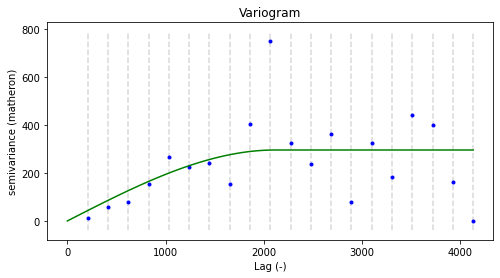

In [ ]:
# Calculate semivariance using skgstat
vv = skgstat.Variogram(coords, z, n_lags=20, use_nugget=True)
print('Lag distances (bins) on the x-axis :', vv.bins)
print('Semivariances on the y-axis        :', vv.experimental)

# Plot variogram
vv.plot(hist=False)
plt.title('Variogram')
plt.show()

Fit the variogram.

{'effective_range': 2226.323705986214,
 'estimator': 'matheron',
 'name': 'exponential',
 'nugget': 5.986163365675431e-14,
 'sill': 294.2216106524626}

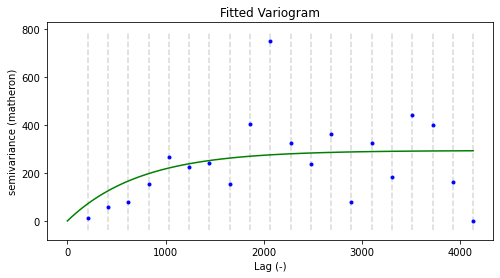

In [ ]:
# Specify inputs for fitting
vv.estimator = 'matheron'
vv.model = 'gaussian'

vv.fit_method = 'trf' # Trust Region Reflective optimizing method (default)
                      # another is `lm` or Levenberg-Marquardt (used in scipy.curve_fit)
                      # however, for this case, 'lm' is not too good
vv.plot(hist=False)
plt.title('Fitted Variogram')
vv.describe()

Do variogram analysis on another dataset from [Connor Johnson's]() geostatsmodel repository. 

In [ ]:
filepath = 'https://raw.githubusercontent.com/cjohnson318/geostatsmodels/master/data/ZoneA.dat'
zoneA = np.loadtxt(filepath, skiprows=10)

x, y, poro = zoneA[:,0], zoneA[:,1], zoneA[:,3]
coords = list(zip(x, y))

column_names = ["x", "y", "thk", "por", "perm", "log-perm", "log-perm-prd", "log-perm-rsd"]
df = pd.DataFrame(zoneA, columns=column_names)

df.head(10)

,x,y,thk,por,perm,log-perm,log-perm-prd,log-perm-rsd
0,12100.0,8300.0,37.1531,14.6515,2.8547,0.4556,0.1357,0.3198
1,5300.0,8700.0,31.4993,14.5093,-999.9999,-999.9999,-999.9999,-999.9999
2,3500.0,13900.0,36.9185,14.0639,-999.9999,-999.9999,-999.9999,-999.9999
3,5100.0,1900.0,24.0156,15.1084,1.1407,0.0572,0.2268,-0.1696
4,9900.0,13700.0,35.0411,13.9190,-999.9999,-999.9999,-999.9999,-999.9999
5,2900.0,900.0,28.4249,13.1304,0.3897,-0.4093,-0.1674,-0.2419
6,7900.0,6700.0,33.2458,14.5724,-999.9999,-999.9999,-999.9999,-999.9999
7,16900.0,4900.0,37.0216,15.0814,-999.9999,-999.9999,-999.9999,-999.9999
8,18700.0,1500.0,40.0446,13.9100,1.5560,0.1920,-0.0121,0.2041
9,2700.0,2100.0,29.1565,13.4024,-999.9999,-999.9999,-999.9999,-999.9999


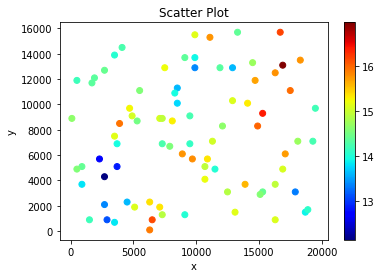

In [ ]:
plt.scatter(x, y, c=poro, cmap='jet')
plt.title('Scatter Plot')
plt.xlabel('x'); plt.ylabel('y')
plt.colorbar()

plt.show()

Lag distances (bins) on the x-axis : [  333.33333333   666.66666667  1000.          1333.33333333
  1666.66666667  2000.          2333.33333333  2666.66666667
  3000.          3333.33333333  3666.66666667  4000.
  4333.33333333  4666.66666667  5000.          5333.33333333
  5666.66666667  6000.          6333.33333333  6666.66666667
  7000.          7333.33333333  7666.66666667  8000.
  8333.33333333  8666.66666667  9000.          9333.33333333
  9666.66666667 10000.        ]
Semivariances on the y-axis        : [0.01423657 0.14428676 0.27781606 0.31887672 0.40236855 0.63915919
 0.4899229  0.70053245 0.54135607 0.65824295 0.81878717 0.57696283
 0.78419585 0.70329568 0.79550124 1.0307367  0.72474361 0.66202594
 0.66573589 0.9188359  0.68242465 0.79531387 0.6440296  0.79781663
 0.70002299 0.83929645 0.74217667 0.75343293 0.69102972 0.72865356]


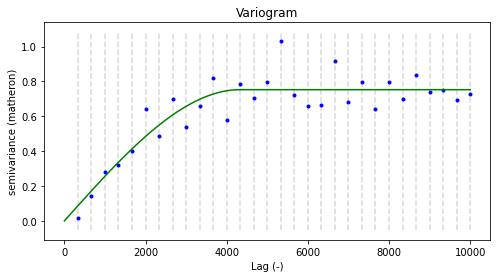

In [ ]:
# Calculate semivariance using skgstat
vv = skgstat.Variogram(coords, poro, n_lags=30, maxlag=10000, use_nugget=True)
print('Lag distances (bins) on the x-axis :', vv.bins)
print('Semivariances on the y-axis        :', vv.experimental)

# Plot variogram
vv.plot(hist=False)
plt.title('Variogram')
plt.show()

Variogram models in `Scikit-gstat` are spherical, exponent, Gaussian, Matern, Stable, and cubic.

{'effective_range': 4113.765960392601,
 'estimator': 'matheron',
 'name': 'matern',
 'nugget': 3.593675630481946e-18,
 'sill': 0.7572834427362884,
 'smoothness': 1.6478094330320847}

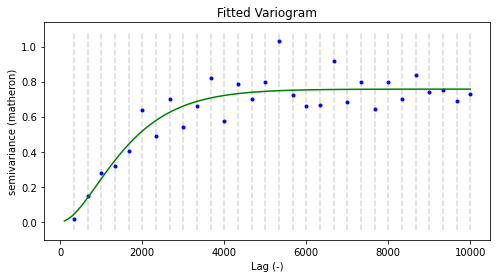

In [ ]:
# Specify inputs for fitting
vv.estimator = 'matheron'
vv.model = 'matern'

vv.fit_method = 'trf' # Trust Region Reflective optimizing method (default)
                      # another is `lm` or Levenberg-Marquardt (used in scipy.curve_fit)
                      # however, for this case, 'lm' is not too good
vv.plot(hist=False)
plt.title('Fitted Variogram')
vv.describe()

## 2D Variogram (directional variogram)

## Ordinary Kriging

Again using `Scikit-gstat` to perform ordinary kriging on the previously fitted variogram.

In [ ]:
ok = skgstat.OrdinaryKriging(vv, min_points=5, max_points=10, mode='exact')

In [ ]:
# build the target grid
xx, yy = np.mgrid[0:99:100j, 0:99:100j]
# field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
# s2 = ok.sigma.reshape(xx.shape)
yy

array([[ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       ...,
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.]])

In [ ]:
x = np.linspace(0, 16000, 100)
y = np.linspace(0, 20000, 100)
xx, yy = np.meshgrid(x, y)

field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)


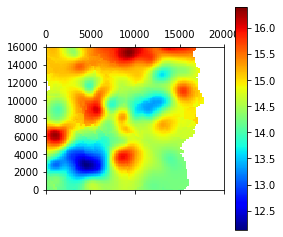

In [ ]:
plt.matshow(field.T, extent=(0, 20000, 0, 16000), origin='lower', cmap='jet')
plt.colorbar()